In [1]:
%matplotlib inline
import parameters
import HULib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import glue
parameters.saveme=True
parameters.plotme=True
parameters.glueme = True  # load data to glue for manipulation of the Universe
fraction=1.0

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')


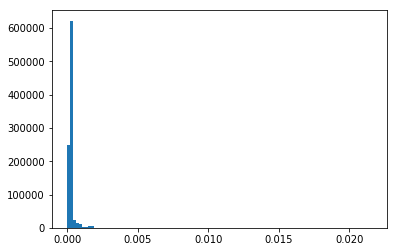

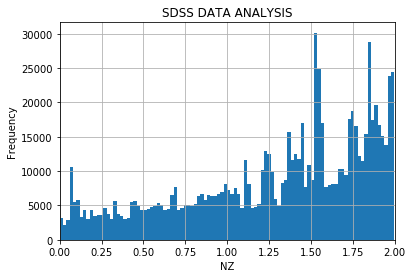

In [2]:
myGalaxy0 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_LOWZ_North.fits')
myGalaxy1 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
myGalaxy = pd.concat([myGalaxy0, myGalaxy1])
counts, bins, bars = plt.hist(myGalaxy.Me, bins=100)
myGalaxy.Me=myGalaxy.Me/bins[1]
myGalaxy=myGalaxy[myGalaxy.Me<2]
myhist=myGalaxy.hist(bins=100, column=["Me"])
myhist[0,0].set_xlim(0,2)
myhist[0,0].set_xlabel("NZ")
myhist[0,0].set_ylabel("Frequency")
myhist[0,0].set_title("SDSS DATA ANALYSIS")
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NZ_Histogram_0.png', dpi=300)
plt.show()

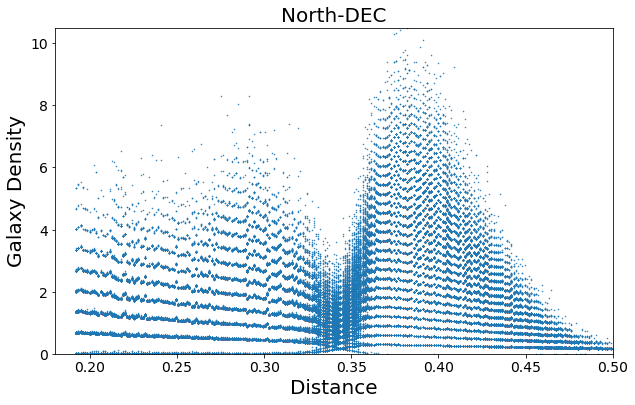

In [3]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

rangesx= (0.18,0.5)
rangesy= (0,10.5)
titleCode=['North-DEC']

# myGalaxy0 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_LOWZ_North.fits')
# myGalaxy1 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
# myGalaxy = pd.concat([myGalaxy0, myGalaxy1])   
# myGalaxy = HULib.fix_BOSS_data(myGalaxy)

myGalaxy_useit=myGalaxy[myGalaxy.alpha>0.15]
df0, dfcount= HULib.normalizeMe_flat(myGalaxy_useit, fraction=fraction)

axes=df0.plot( x='alpha', y='Me',style='.',fontsize=14,ylim=rangesy,xlim=rangesx,
              legend=False,markersize=1,figsize=(10, 6))
axes.set_title('North-DEC', fontsize=20 )
axes.set_ylabel("Galaxy Density", fontsize=20)
axes.set_xlabel("Distance", fontsize=20)
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'ManyBangsNorthMASSNorm.png', dpi=300)
plt.show()

In [4]:
myGalaxy_useit.shape

(863649, 17)

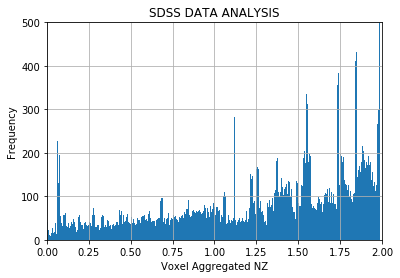

In [5]:
n=10000
myhist=myGalaxy_useit.hist(bins=n, column=["Me"])
myhist[0,0].set_xlim(0,2)
myhist[0,0].set_ylim(0,5E6/n)
myhist[0,0].set_xlabel("Voxel Aggregated NZ")
myhist[0,0].set_ylabel("Frequency")
myhist[0,0].set_title("SDSS DATA ANALYSIS")
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NZ_Histogram_10000.png', dpi=300)
plt.show()

/Users/mp74207/anaconda3/envs/hyper/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(<matplotlib.axes._subplots.AxesSubplot at 0x1a33d22208>,
 0.00024164820206351578,
 0.3240000009536743)

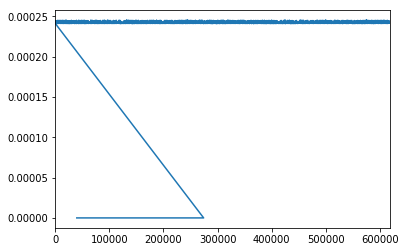

In [20]:
myGalaxy_useit["alphaMostFrequent"]=0.0
uniqueDEC==myGalaxy_useit.DEC.unique()
uniqueAlpha==myGalaxy_useit.alpha.unique()
nn=200
ind= myGalaxy_useit.alpha==uniqueAlpha[nn]
id=myGalaxy_useit.loc[ind, 'NZ'].value_counts().idxmax()
myGalaxy_useit.loc[ind, 'NZ'].plot(),id, uniqueAlpha[nn]

In [23]:
uniqueAlpha["NZ"]=0.0
for x in uniqueAlpha[0:5]:
    ind=myGalaxy_useit.alpha==x
    id=myGalaxy_useit.loc[ind, 'NZ'].value_counts().idxmax()
    uniqueAlpha.loc[uniqueAlpha.alpha==x]=id
    myGalaxy_useit.loc[ind,"alphaMostFrequent"]=id


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:
uniqueAlpha

array([0.23199999, 0.226     , 0.25      , 0.183     , 0.215     ,
       0.27599999, 0.27700001, 0.15099999, 0.248     , 0.27900001,
       0.236     , 0.20999999, 0.266     , 0.23899999, 0.184     ,
       0.164     , 0.162     , 0.17399999, 0.205     , 0.255     ,
       0.191     , 0.243     , 0.26699999, 0.199     , 0.23      ,
       0.197     , 0.26199999, 0.20100001, 0.222     , 0.206     ,
       0.228     , 0.214     , 0.235     , 0.182     , 0.26899999,
       0.229     , 0.237     , 0.227     , 0.2       , 0.25999999,
       0.20200001, 0.252     , 0.23800001, 0.213     , 0.28999999,
       0.25099999, 0.207     , 0.259     , 0.273     , 0.22      ,
       0.26100001, 0.25799999, 0.25600001, 0.161     , 0.27500001,
       0.18799999, 0.21799999, 0.24699999, 0.264     , 0.15800001,
       0.189     , 0.242     , 0.204     , 0.257     , 0.212     ,
       0.221     , 0.223     , 0.278     , 0.167     , 0.20900001,
       0.24600001, 0.25299999, 0.27200001, 0.208     , 0.177  

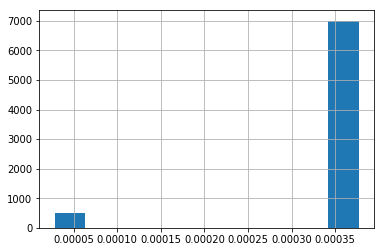

In [62]:
nn=100
ind=myGalaxy_useit.alpha==uniqueAlpha[nn]
myGalaxy_useit.loc[ind,"alpha_NZ_mean"]=myGalaxy_useit[ind].NZ.mean()
myGalaxy_useit.loc[ind,"alpha_NZ_std"]=myGalaxy_useit[ind].NZ.std()
myGalaxy_useit.loc[ind].NZ.hist()

# Binning

In [29]:
mySet=[0,1]
a=mySet[0]
b=mySet[1]
NumGalaxies = 10  # number of galaxies to be sampled in the 2-point correlation.  For professional calculation use 500
correctMe=True
df01, autocorr01=HULib.TwoPointCorr_mod(mySet,NumGalaxies,myGalaxy_useit, correctMe=correctMe)

0.0 0
0.02 0
0.04 0
0.06 0
0.08 0


In [28]:
df01.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=.4)


rangesx= [(0,0.5),(0.0,0.5),(0,0.5),(0.0,0.5)]
rangesy= [(0,4.5),(0.0,4.5),(0,4.5),(0.0,4.5)]
position = [(0,0),(0,1),(1,0),(1,1)]
titleCode=['North-DEC','South-DEC','North-RA','South-RA',]

for i in range(4):
    key = myKeys[i][0]
    val1 = myKeys[i][1]
    val2 = myKeys[i+4][1]
    print(i,key,val1,val2)
    myGalaxy = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + val1),
                         HULib.get_BOSS_data(parameters.sdssAddress + val2)])
    myGalaxy = HULib.fix_BOSS_data(myGalaxy)
    df0, dfcount= normalizeMe(myGalaxy,fraction=fraction)
    df0.plot(ax=axes[position[i]], x='alpha', y='Me',style='.',xlim=rangesx[i], 
             fontsize=14, ylim=rangesy[i],legend=False,markersize=3)
    axes[position[i]].set_title(titleCode[i], fontsize=20 )
    axes[position[i]].set_ylabel("Galaxy Density", fontsize=20)
    axes[position[i]].set_xlabel("Distance", fontsize=20)
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsGlobalNorm.png', dpi=300)
    
plt.show()

In [ ]:
df_total_mass=pd.DataFrame({'Galaxy Seeding Prob' : df0.groupby( ['alpha'])['Me'].sum()}).reset_index()
ax=df_total_mass.plot(x="alpha"  , y="Galaxy Seeding Prob", figsize=(10,8), fontsize=14)
ax.set_xlabel("Distance", fontsize=20)
ax.set_ylabel("Galaxy Seeding Probability (arb. units)", fontsize=20)
ax.set_title("Normalized Luminous Mass per volume", fontsize=20)
ax.set_xlim(0,0.5)
ax.set_ylim(0,700)
ax2 = ax.twinx()
ax2.set_ylim(0,45)
ax2.set_ylabel("Obs Density (arb. units)", fontsize=20)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h2+h1, l1+l2, loc=2)
dfcountplot=dfcount.copy()
dfcountplot.columns= ['Obs Density']
dfcountplot["Obs Density"]*=5
dfcountplot.plot(y="Obs Density", ax=ax2, color="red", fontsize=14)

fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'NormalizedSeedProb.png', dpi=300)
    
plt.show()

In [ ]:
df2=pd.pivot_table(df0,values="Me",index=["alpha"], columns=["DEC"],
                   aggfunc="sum", fill_value=0)

glue.qglue(star=df0)


In [ ]:
df0.alpha.unique()

# NO BINNING

In [ ]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=.4)


rangesx= [(0,1.2),(0.0,1.2),(0,1.2),(0.0, 1.2)]
rangesy= [(0,20.9),(0.0,20.9),(0,20.0),(0.0,20.0)]
position = [(0,0),(0,1),(1,0),(1,1)]
titleCode=['North-DEC','South-DEC','North-RA','South-RA',]

for i in range(4):
    key = myKeys[i][0]
    val1 = myKeys[i][1]
    val2 = myKeys[i+4][1]
    print(i,key,val1,val2)
    myGalaxy = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + val1),
                         HULib.get_BOSS_data(parameters.sdssAddress + val2)])
    myGalaxy = HULib.fix_BOSS_data_noBinning(myGalaxy)
    df0, dfcount= normalizeMe(myGalaxy)
    df0.plot(ax=axes[position[i]], x='alpha', y='Me',style='.',xlim=rangesx[i], 
             fontsize=14, ylim=rangesy[i],legend=False,markersize=3)
    axes[position[i]].set_title(titleCode[i], fontsize=20 )
    axes[position[i]].set_ylabel("Galaxy Density", fontsize=20)
    axes[position[i]].set_xlabel("Redshift Z - No Binning", fontsize=20)
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsGlobal_noBinning.png', dpi=300)
    
plt.show()

In [ ]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

rangesx= (0.,1.2)
rangesy= (0,0.5)
titleCode=['North-DEC']

myGalaxy = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
myGalaxy = HULib.fix_BOSS_data_noBinning(myGalaxy)
df0, dfcount= normalizeMe(myGalaxy)
axes=df0.plot( x='alpha', y='Me',style='.',xlim=rangesx, 
         fontsize=14, ylim=rangesy,legend=False,markersize=1,figsize=(10, 6))

axes.set_title('North-DEC', fontsize=20 )
axes.set_ylabel("Galaxy Density", fontsize=20)
axes.set_xlabel("Redshift Z - No Binning", fontsize=20)
fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsNorthMASS_noBinning.png', dpi=300)
    
plt.show()

# Calculate the number of galaxies per distance

In [ ]:
gal = parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits';
myGalaxy0 = HULib.get_BOSS_data(gal)
numGalaxies=myGalaxy0.shape[0]
df=myGalaxy0.Z.to_frame()
df["alpha"]=[HULib.alphaZ(x)*4/np.pi for x in df.Z]
# Just a figure and one subplot
fig, ax = plt.subplots()
hist = df.hist(column="Z", bins=100, ax=ax)
ax.set_xlabel("Redshift Z", fontsize=20)
ax.set_ylabel("Number of Galaxies", fontsize=20)
plt.xlim((0.0,1.0))
ax.set_title('Number of Galaxies per Redshift Z', fontsize=20)
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NumGalaxiesPerZ.png', dpi=300)

In [ ]:
gal = parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits';
myGalaxy0 = HULib.get_BOSS_data(gal)
numGalaxies=myGalaxy0.shape[0]
df=myGalaxy0.Z.to_frame()
df["alpha"]=[HULib.alphaZ(x)*4/np.pi for x in df.Z]
# Just a figure and one subplot
fig, ax = plt.subplots()
hist = df.hist(column="alpha", bins=100, ax=ax)
ax.set_xlabel("Normalized Distance", fontsize=14)
ax.set_ylabel("Number of Galaxies", fontsize=14)
plt.xlim((0.0,0.5))
ax.set_title('Number of Galaxies per Distance', fontsize=16)
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NumGalaxiesPerDistance.png', dpi=300)

# Universe Cross-Section Calculation

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),
                           HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    myGalaxy1.alpha=4/np.pi*myGalaxy1.alpha
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    myGalaxy1.alpha=4/np.pi*myGalaxy1.alpha
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)